# Adesso adaptado neste Colab

## Vídeos antigos
* [Adesso3-mmd-9-17 (76min)](https://www.loom.com/share/2da4f118c66547cdb4000f5206bfb7d7)


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np
import skimage

In [2]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=f3c55f2a-ecdb-4a55-b1d2-a14e96deb2e0
To: /content/_morph.py
100% 39.2k/39.2k [00:00<00:00, 34.6MB/s]


In [3]:
from _morph import *

# mmdcells

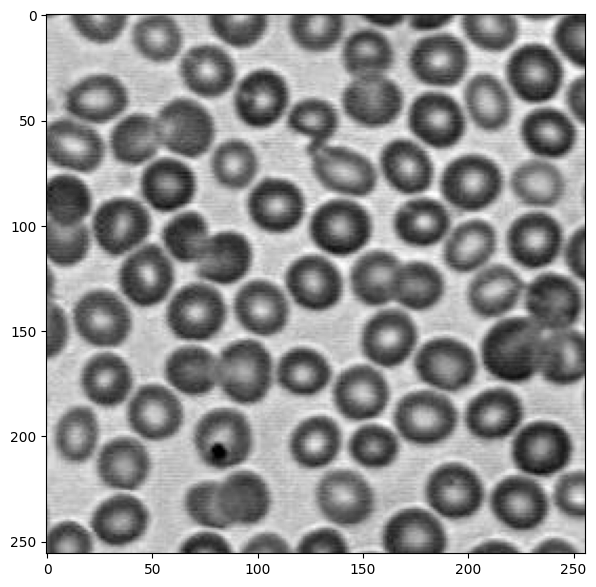

In [4]:
img = mm.read('https://drive.google.com/file/d/1nS7OyC6Tf1mpu4kjs-G-AXt5T3XSo9nC/view?usp=sharing')
a = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
plt.figure(figsize=(7, 7))
mm.show(a)  

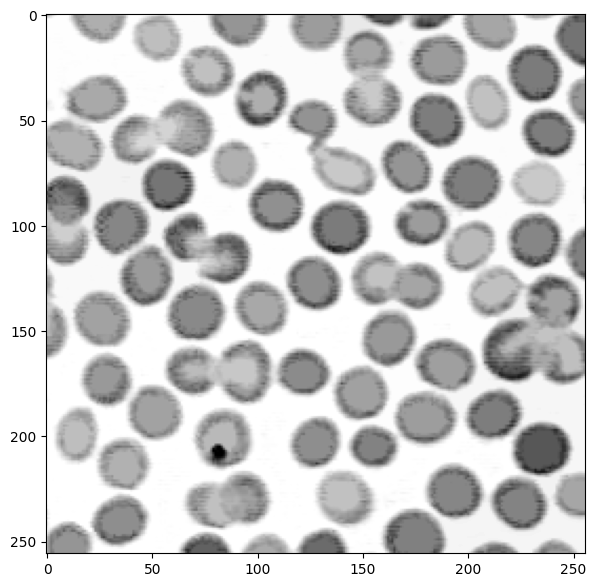

In [5]:
b = mm.areaopen(a,200)
plt.figure(figsize=(7, 7))
mm.show(b)

In [6]:
np.amax(b)

7884273

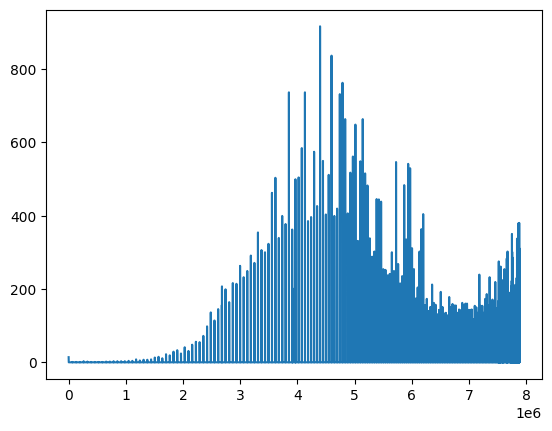

In [7]:
hist,bins = np.histogram(b.ravel(),np.amax(b),[0,np.amax(b)])
plt.plot(hist)

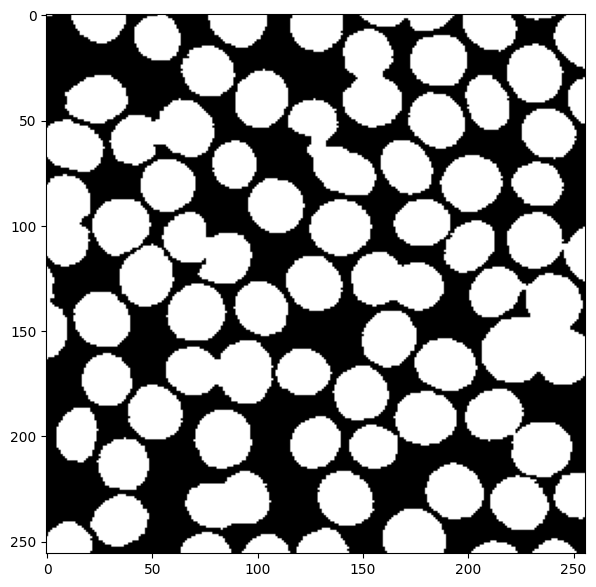

In [8]:
c = np.array(b<6700000, dtype='uint8')
plt.figure(figsize=(7, 7))
mm.show(c)

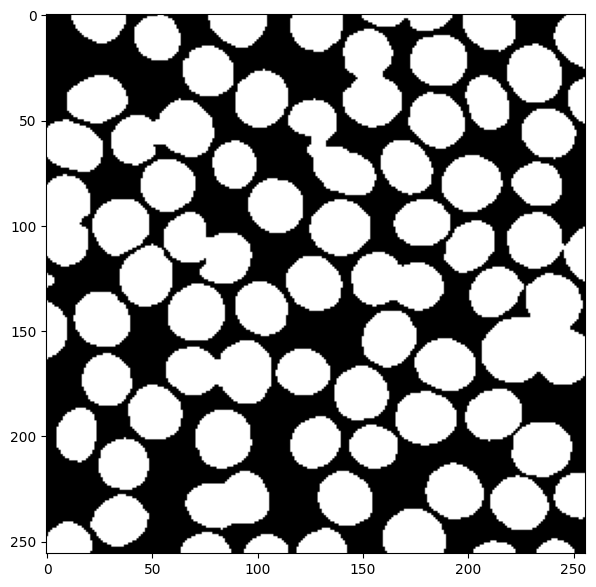

In [9]:
d = mm.open(c,mm.sedisk(7))
plt.figure(figsize=(7, 7))
mm.show(d) 

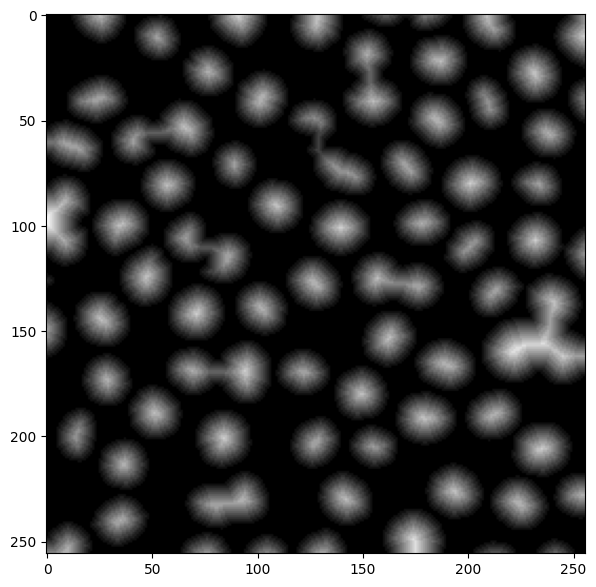

In [10]:
e = mm.dist(d)

plt.figure(figsize=(7, 7))
mm.show(e)

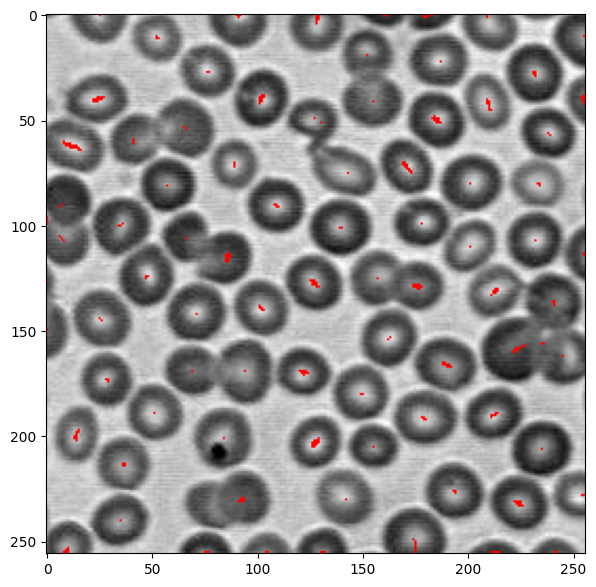

In [11]:
f = mm.regmax(e,mm.secross())
plt.figure(figsize=(7, 7))
mm.show(img,f>0)

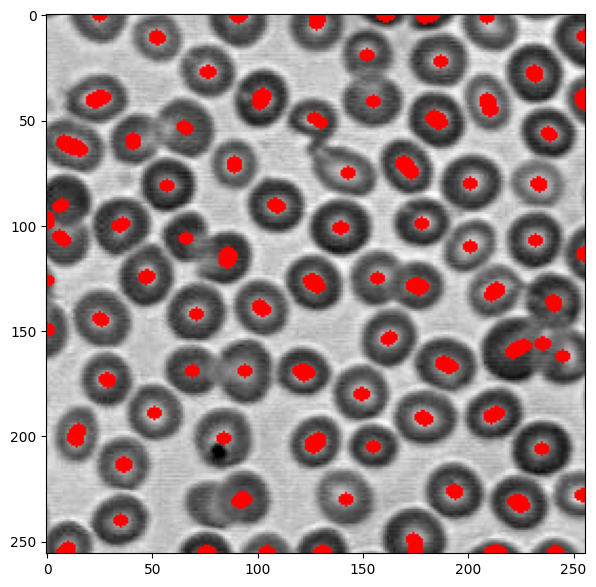

In [12]:
g = mm.dil(f,mm.sedisk(7))
g = np.array(mm.dil(g,mm.sedisk(1))>0,dtype='uint8')
plt.figure(figsize=(7, 7))
mm.show(img,g)

255

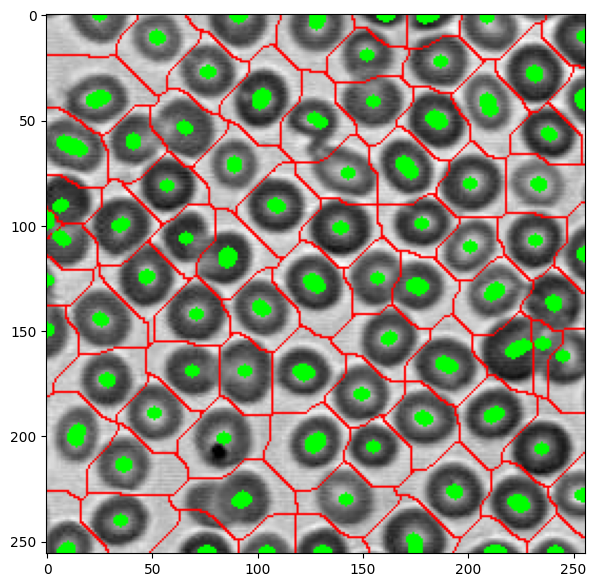

In [13]:
img0 = img.copy()
e1 = mm.neg(e)
e2 = cv2.cvtColor(e1 ,cv2.COLOR_GRAY2RGB) # converte para grayscale

gg = np.array(g>0,dtype='uint8')*255
h = mm.watershed([],gg, 'line')
h = np.array(h>0,dtype='uint8')
h1 = mm.ero(h,np.ones((1,2),dtype='uint8'))
h2 = mm.ero(h,np.ones((2,1),dtype='uint8'))
h3 = np.maximum(h1,h2)
plt.figure(figsize=(7, 7))
mm.show(img0,h3,gg) 
np.amax(gg)

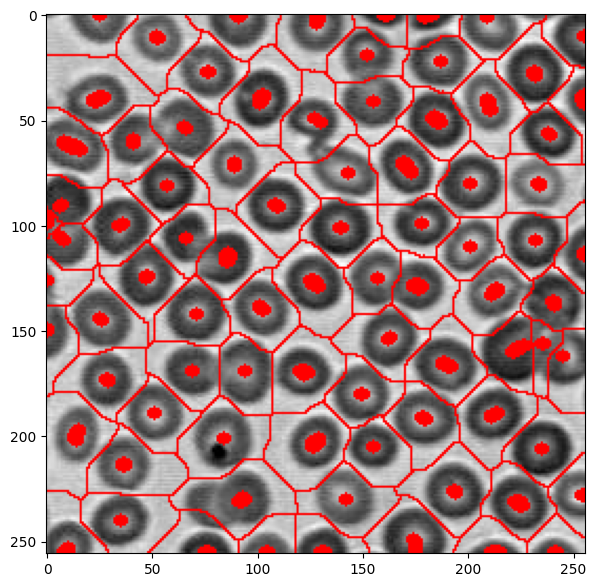

In [14]:
i = mm.union(g,h)
plt.figure(figsize=(7, 7))
mm.show(img,i) 

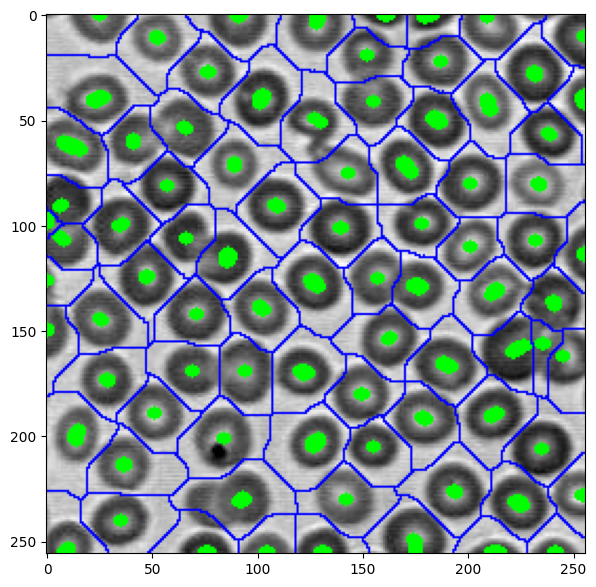

In [15]:
img0 = img.copy()
markers = mm.waterB(img0,i)
plt.figure(figsize=(7, 7))
mm.show(img0,markers==-1,g,h)

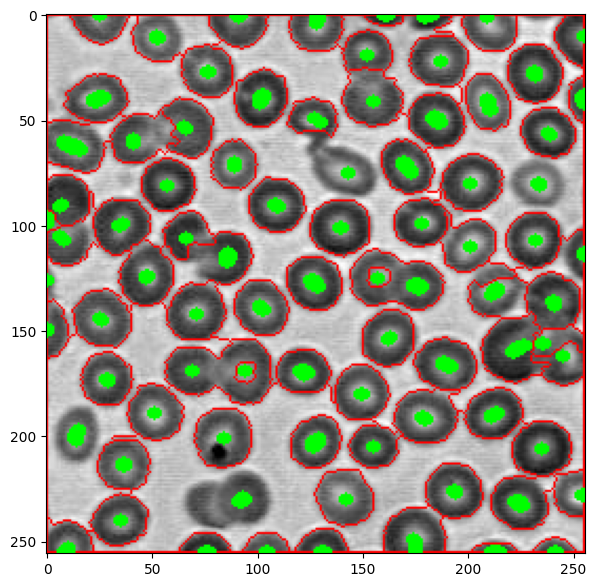

In [16]:
img0 = img.copy()
markers = mm.watershed(img0,g)
plt.figure(figsize=(7, 7))
mm.show(img0,markers==-1,g)

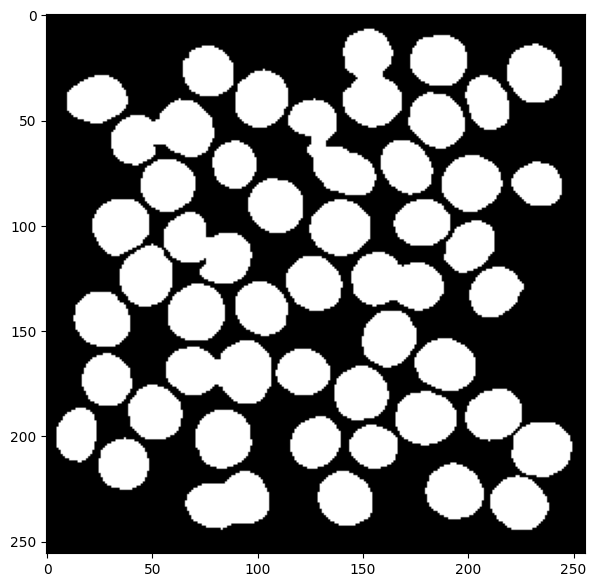

In [17]:
h = mm.edgeoff(d)
plt.figure(figsize=(7, 7))
mm.show(h)

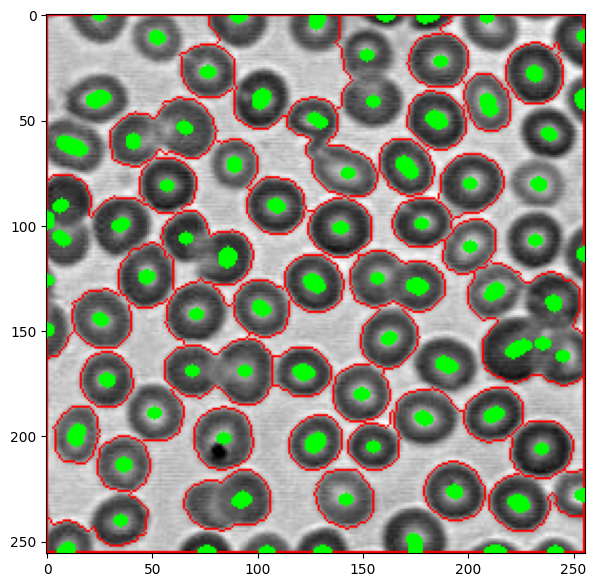

In [18]:
img0 = img.copy()
j = mm.watershed(img0,h)
plt.figure(figsize=(7, 7))
mm.show(img0,j==-1,g)